In [3]:
pip install numpy pandas scikit-learn tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
dates = pd.date_range("2024-01-01", "2024-11-24")
price = np.sin(np.linspace(0, 6.28, len(dates))) * 50 + 150
data = pd.DataFrame({"Date" : dates, "Price" : price})

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Price"].values.reshape(-1,1))
data

,Date,Price
0,2024-01-01,150.000000
1,2024-01-02,150.957259
2,2024-01-03,151.914166
3,2024-01-04,152.870372
4,2024-01-05,153.825526
...,...,...
324,2024-11-20,146.015695
325,2024-11-21,146.970640
326,2024-11-22,147.926695
327,2024-11-23,148.883510


In [5]:
sequence_length = 30

In [6]:
X, Y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    Y.append(scaled_data[i,0])
X, Y = np.array(X), np.array(Y)

In [7]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1))),
model.add(LSTM(units=50)),
model.add(Dense(units=1))

C:\Users\UG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X,Y, epochs=50, batch_size=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2033
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0236
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0113
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0174
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━

In [15]:
test_input = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
predicted_price_scaled = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [19]:
predict_price = scaler.inverse_transform(predicted_price_scaled)
print(f"Predicted Price: {predict_price[0][0]:.2f}")

Predicted Price: 151.05


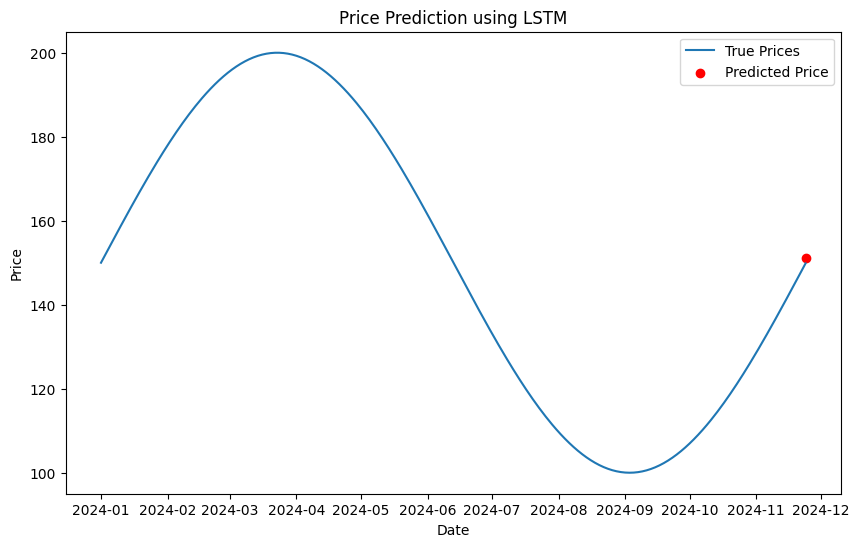

In [23]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.plot(data["Date"], data["Price"], label="True Prices")
plt.scatter(data["Date"].iloc[-1], predict_price, color='red', label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Prediction using LSTM")
plt.legend()
plt.show()

In [21]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.55.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl (56 kB)
  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
